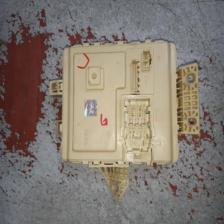

<Response [200]>
{'top_1': '91955B1251', 'top_2': '96370B1010', 'top_3': '391013LDD0', 'top_4': '95480B1050', 'top_5': '92401B1000'}


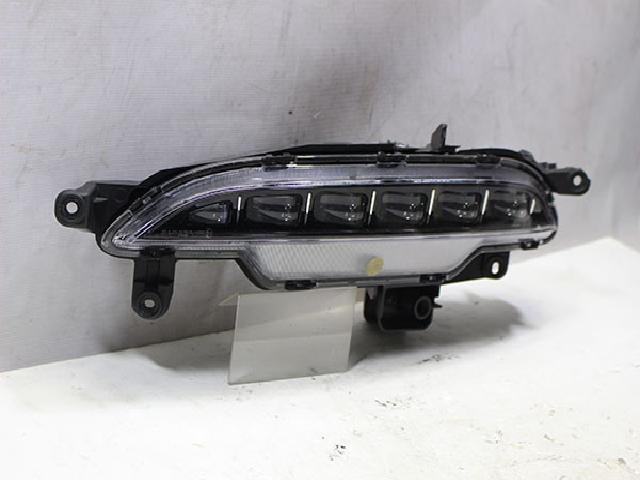

<Response [200]>
{'top_1': '92201B1500', 'top_2': '92202B1500', 'top_3': '92207D2000', 'top_4': '92102G9100', 'top_5': '92404AR000'}


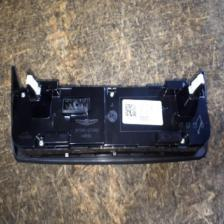

<Response [200]>
{'top_1': '97250B1012', 'top_2': '96510B1010', 'top_3': '95450B1400', 'top_4': '92401B1000', 'top_5': '924A3T1100'}


In [2]:
import pickle, timm, torch, cv2, base64, requests, json
from transformations import get_tfs
from PIL import Image
from glob import glob

root = "sample_ims/gen/"
content_type = "image/jpeg"
im_paths = glob(f"{root}*.jpg")

for idx, im_path in enumerate(im_paths):
    
    if idx == 3: break
    
    headers = {"content-type": content_type}
    _, encoded_im = cv2.imencode(".jpg", cv2.imread(im_path))
    text_im = base64.b64encode(encoded_im).decode()
    result = {}
    # result["text_im"] = encoded_im
    result["im"] = text_im
    resp = requests.post("http://localhost:8610/predict", data = json.dumps(result))
    display(Image.open(im_path))
    resp.encoding = 'ascii'
    print(resp)
    print(resp.json()["results"])   
